# CAP 5768 - Data Science - Dr. Marques - Fall 2019

# Gabor Kovacs

# Assignment 1: The Python data science stack 
## Solutions

### Goals 

- To get acquainted with Python and Jupyter notebooks.
- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured as a game, with three levels of increasing complexity.
- For each level, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 320 (plus up to 44 bonus points), distributed as follows: Level 1 (82 pts), Level 2 (70+ pts), Level 3 (132+ pts) and Conclusions (36 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

------------
## Level 1: Presidents of the USA

The Python code below will load a dataset containing the names of the first 44 presidents of the USA and their heights, available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values.

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr


In [2]:
file = 'data/president_heights.csv'
presidents = pd.read_csv(file) 
presidents

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


## Your turn! (8 points)

Write code to display the histogram (4 pts) of president's heights and compute summary statistics (4 pts): 

- Mean height
- Standard deviation
- Minimum height, and 
- Maximum height.

## Solution

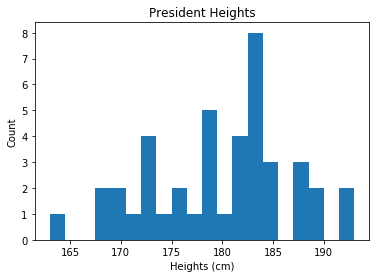

Mean: 179.73809523809524
Standard Deviation: 7.0158688553582955
Minimum: 163
Maximum: 193


In [3]:
# Histogram:

plt.title('President Heights')
plt.hist(presidents['height(cm)'], bins=20)
plt.xlabel('Heights (cm)')
plt.ylabel('Count')
plt.show()

# Mean height
mean = presidents['height(cm)'].mean()
print('Mean:', mean)

# Standard deviation
std = presidents['height(cm)'].std()
print('Standard Deviation:', std)

# Minimum height
min = presidents['height(cm)'].min()
print('Minimum:', min)

# Maximum height
max = presidents['height(cm)'].max()
print('Maximum:', max)

## Your turn! (18 points)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

1. Who was(were) the tallest president(s)?
2. Who was(were) the shortest president(s)?
3. How many presidents were 6' tall or taller?

## Solution

In [4]:
# Tallest:
# Sort by presidents' height descending
sortedByHeightDescending = presidents.sort_values(by='height(cm)', ascending=False)
sortedByHeightDescending.head(5)
print('Tallest: ')
print(sortedByHeightDescending.head(5))

print()
print()
print()


# Shortest:
# Sort by presidents' height ascending
sortedByHeightAscending = presidents.sort_values(by='height(cm)', ascending=True)
sortedByHeightAscending.head(5)
print('Shortest: ')
print(sortedByHeightAscending.head(5))

print()
print()
print()


# Over 6' Tall
# 6' == 182.88cm

overSixFeet = (presidents['height(cm)']) > 182.88
presidentsOverSixFeet = presidents[overSixFeet]
print('Presidents Over 6ft:')
print(presidentsOverSixFeet.sort_values(by='height(cm)', ascending=False))

Tallest: 
    order               name  height(cm)
15     16    Abraham Lincoln         193
33     36  Lyndon B. Johnson         193
0       1  George Washington         189
2       3   Thomas Jefferson         189
39     42       Bill Clinton         188



Shortest: 
    order               name  height(cm)
3       4      James Madison         163
7       8   Martin Van Buren         168
21     23  Benjamin Harrison         168
1       2         John Adams         170
22     25   William McKinley         170



Presidents Over 6ft:
    order                   name  height(cm)
33     36      Lyndon B. Johnson         193
15     16        Abraham Lincoln         193
0       1      George Washington         189
2       3       Thomas Jefferson         189
39     42           Bill Clinton         188
38     41      George H. W. Bush         188
29     32  Franklin D. Roosevelt         188
37     40          Ronald Reagan         185
41     44           Barack Obama         185
6       7 

-------------

This is an extremely small, simple and manageable dataset. 

Let's use it to prove a silly hypotheses, for example: 

"H1: Even-numbered presidents are, in average, taller than odd-numbered ones." 

## Your turn! (24 points)

Write Python code to test hypothesis H1.

## Solution

In [5]:
# Separate the presidents into 2 lists, even and odd ordered
evenOrder = presidents['order'] % 2 == 0
print('Even Order Presidents:')
evenPresidents = presidents[evenOrder]
print(evenPresidents)

print()
print()
print()

oddOrder = presidents['order'] % 2 == 1
print('Odd Order Presidents:')
oddPresidents = presidents[oddOrder]
print(oddPresidents)

print()
print()
print()

# Get the average height of each list
averageOfEvenOrderPresidents = evenPresidents['height(cm)'].mean()
averageOfOddOrderPresidents = oddPresidents['height(cm)'].mean()

# Compare the 2 averages
print('Average of Even Order Presidents: ', averageOfEvenOrderPresidents)
print('Average of Odd Order Presidents: ', averageOfOddOrderPresidents)

Even Order Presidents:
    order                   name  height(cm)
1       2             John Adams         170
3       4          James Madison         163
5       6      John Quincy Adams         171
7       8       Martin Van Buren         168
9      10             John Tyler         183
11     12         Zachary Taylor         173
13     14        Franklin Pierce         178
15     16        Abraham Lincoln         193
17     18       Ulysses S. Grant         173
19     20      James A. Garfield         183
23     26     Theodore Roosevelt         178
25     28         Woodrow Wilson         180
27     30        Calvin Coolidge         178
29     32  Franklin D. Roosevelt         188
31     34   Dwight D. Eisenhower         179
33     36      Lyndon B. Johnson         193
35     38            Gerald Ford         183
37     40          Ronald Reagan         185
39     42           Bill Clinton         188
41     44           Barack Obama         185



Odd Order Presidents:
    ord

## Question 1 (4 points)

Was hypothesis H1 confirmed or refuted?

## Solution

Hypothesis Refuted, as expected. We were not given any reason to believe that the 'order' field held any significance, therefor we can assume that the presidents were randomely ordered and should then not have any relationship to height.

---------------------

Now it's time for you to come up with a different (but also silly) hypotheses, which we will call H2. **Be creative!**

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

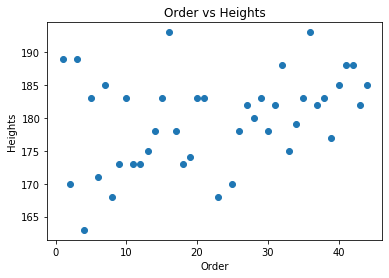

In [6]:
# H2: Presidents are getting taller due to better nutrition.


# Sort the presidents in ascending order
sortedPresidents = presidents.sort_values(by='order')
#print(sortedPresidents)

# Chart it
plt.scatter(presidents['order'], presidents['height(cm)'])
plt.title('Order vs Heights')
plt.xlabel('Order')
plt.ylabel('Heights')
plt.show()

# See if there is positive slope.
# Sorting by order, it almost looks as though the heights are in fact increasing, 
# but I would say that there just isn't enough data to say with certainty.

-------------------
## Level 2: HR payroll

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [7]:
salaries = pd.read_csv('data/salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


## Question 2 (6 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

## Solution

__earn:__ This appears to be yearly salary in some type of currency

__height:__ Height in cm

__sex:__ The sex of the individual, male or famale

__ed:__ Years of education

__age:__ Number of times the earth has revolved around the sun since the person's birth

__race:__ The person's race: black, white, etc.


--------------------

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [8]:
salary = np.array(salaries['earn'])
print("Salary statistics")
print("Minimum salary (global):", np.min(salary))
print("Maximum salary (global):", np.max(salary))
print("Average salary (global):", np.mean(salary))
print("Median  salary (global):", np.median(salary))

Salary statistics
Minimum salary (global): 200.0
Maximum salary (global): 200000.0
Average salary (global): 23154.773489932886
Median  salary (global): 20000.0


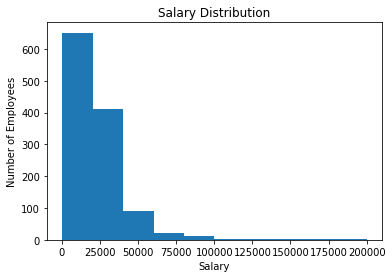

In [9]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

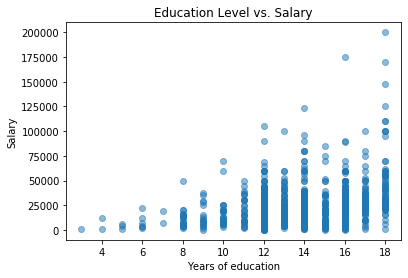

In [10]:
years = np.array(salaries['ed'])
plt.title('Education Level vs. Salary')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary,  alpha=0.5)
plt.show()

In [11]:
# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894846


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

## Your turn! (16+ points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (4 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (12 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 16 bonus points)


## Solution

In [12]:
# 1. Display the total headcount and the number (and %) of male and female employees. (4 pts)

sexArray = np.array(salaries['sex'])
totalEmployees = sexArray.size
print('Total Headcount:', totalEmployees)

males = sexArray[sexArray == 'male'].size
females = sexArray[sexArray == 'female'].size

print('Males:', males)
print('Females:', females)

malesAsAPercentOfTotal = np.round(males / totalEmployees * 100, decimals = 1)
femalesAsAPercentOfTotal = np.round(females / totalEmployees * 100)

print('Males as a percent of total:', malesAsAPercentOfTotal, '%')
print('Females as a percent of total:', femalesAsAPercentOfTotal, '%')

Total Headcount: 1192
Males: 505
Females: 687
Males as a percent of total: 42.4 %
Females as a percent of total: 58.0 %


In [13]:
# 2. Compute and display the min, max, average, and median salary per gender. (12 pts)
males = salaries['sex']=='male'
females = ~males

minMaleSalary = salaries[males].min()['earn']
maxMaleSalary = salaries[males].max()['earn']
meanMaleSalary = salaries[males].mean()['earn']
mediumMaleSalary = salaries[males].median()['earn']

minFemaleSalary = salaries[females].min()['earn']
maxFemaleSalary = salaries[females].max()['earn']
meanFemaleSalary = salaries[females].mean()['earn']
mediumFemaleSalary = salaries[females].median()['earn']

print('Min Male Salary:', '${:,.2f}'.format(minMaleSalary))
print('Max Male Salary:', '${:,.2f}'.format(maxMaleSalary))
print('Mean Male Salary:', '${:,.2f}'.format(meanMaleSalary))
print('Medium Male Salary:', '${:,.2f}'.format(mediumMaleSalary))
print()
print('Min Female Salary:', '${:,.2f}'.format(minFemaleSalary))
print('Max Female Salary:', '${:,.2f}'.format(maxFemaleSalary))
print('Mean Female Salary:', '${:,.2f}'.format(meanFemaleSalary))
print('Medium Female Salary:', '${:,.2f}'.format(mediumFemaleSalary))

Min Male Salary: $1,000.00
Max Male Salary: $200,000.00
Mean Male Salary: $29,786.13
Medium Male Salary: $25,000.00

Min Female Salary: $200.00
Max Female Salary: $123,000.00
Mean Female Salary: $18,280.20
Medium Female Salary: $15,000.00


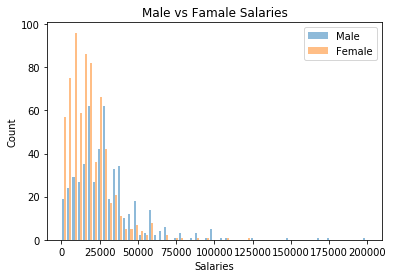

In [14]:
# 3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (if any is present) 
# associated with the salaries in the company. (<= 16 bonus points)

maleSalaries = salaries[males]['earn']
femaleSalaries = salaries[females]['earn']

b = 60

plt.title('Male vs Famale Salaries')

plt.hist([maleSalaries,femaleSalaries], bins=b, alpha=0.5, label=['Male','Female'])

plt.xlabel('Salaries')
plt.ylabel('Count')

plt.legend(loc='upper right')
plt.show()

# The male salary distribution does appear to be shifted to the right somewhat.

--------------------

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, height. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------

At this point, formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as ageism. 

Call these hypotheses H3, H4, and H5. 

**Be creative, but realistic! These should be reasonable hypotheses, not silly ones!**

## Your turn! (48+ points)

Write Python code to test hypotheses H3, H4, and H5 (and some text to explain whether they were confirmed or not). Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. (16 pts per hypothesis with additional <= 8 bonus points per hypotheses).  

## Solution

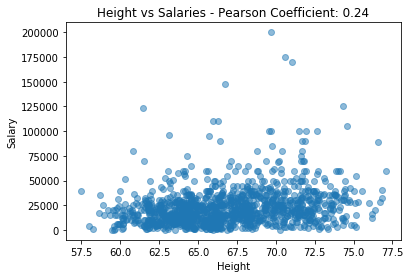

In [15]:
# H3: Average salaries vary depending on height

heightArray = np.array(salaries['height'])
salariesArray = np.array(salaries['earn'])

corr, _ = pearsonr(heightArray, salariesArray)
title = 'Height vs Salaries - Pearson Coefficient: ' + str(np.round(corr, decimals=2))

plt.title(title)

plt.xlabel('Height');
plt.ylabel('Salary')

plt.scatter(heightArray, salariesArray, alpha=0.5)
plt.show()

# Pearson Coefficient of 0.24 is telling us that there is low correlation between Height and Salary

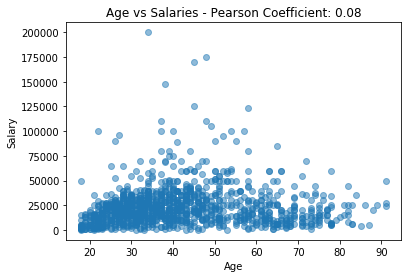

In [16]:
# H4: Average salaries vary depending on age

ageArray = np.array(salaries['age'])
salariesArray = np.array(salaries['earn'])

corr, _ = pearsonr(ageArray, salariesArray)
title = 'Age vs Salaries - Pearson Coefficient: ' + str(np.round(corr, decimals=2))

plt.title(title)

plt.xlabel('Age');
plt.ylabel('Salary')

plt.scatter(ageArray, salariesArray, alpha=0.5)
plt.show()

# Pearson Coefficient of nearly 0 is telling us that there is no correlation between Age and Salary

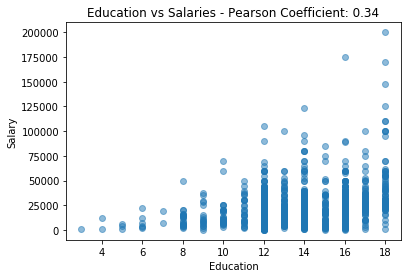

In [17]:
# H5: Average salaries vary depending on education

educationArray = np.array(salaries['ed'])
salariesArray = np.array(salaries['earn'])

corr, _ = pearsonr(educationArray, salariesArray)
title = 'Education vs Salaries - Pearson Coefficient: ' + str(np.round(corr, decimals=2))

plt.title(title)

plt.xlabel('Education');
plt.ylabel('Salary')

plt.scatter(educationArray, salariesArray, alpha=0.5)
plt.show()

# Pearson Coefficient of 0.34 is telling us that there is low correlation between Education and Salary

-------------------
## Level 3: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [18]:
sns.set(style='ticks', palette='Set2')
%matplotlib inline

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [19]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Question 3 (6 points)

What was the net effect of the line of code

``data.dropna(inplace=True)``?

## Solution

_dropna_ removes any row which has any null values (this can be change with the _how_ parameter). The _inplace=True_ parameter instructs the function to perform the operation 'in place', that is, don't make a copy, just complete the operation on the existing dataframe.

## Your turn! (18+ points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (12 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (6 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 points)


## Solution

In [20]:
# 1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and 
# discard those entries (rows). (12 pts)

numberCars = data.shape[0]

print('Number of cars: ', numberCars)

_3and5CylinderCarsDataFrame = data[(data['cylinders'] == 3) | (data['cylinders'] == 5)]

numberOf3and5CylinderCars = _3and5CylinderCarsDataFrame.shape[0]

print('Number of 3 and 5 cylinder cars: ', numberOf3and5CylinderCars)
 
indicesOfRecordsToDrop = _3and5CylinderCarsDataFrame.index.values
    
data2 = data.drop(indicesOfRecordsToDrop)

numberOfRecordsAfter3and5CylinderCarsWereRemoved = data2.shape[0]

print('Number of records after 3 and 5 cylinder cars were removed: ', numberOfRecordsAfter3and5CylinderCarsWereRemoved)

Number of cars:  392
Number of 3 and 5 cylinder cars:  7
Number of records after 3 and 5 cylinder cars were removed:  385


In [21]:
# 2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 
# 8-cylinder vehicles. (6 pts)

_4CylinderCars = data2[(data['cylinders'] == 4)]
_6CylinderCars = data2[(data['cylinders'] == 6)]
_8CylinderCars = data2[(data['cylinders'] == 8)]

print('4 Cylinder Metrics')
print('--------------------------------------------------------------------------------------------------')
print('Min: ', _4CylinderCars.mpg.min())
print('Max: ', _4CylinderCars.mpg.max())
print('Mean: ', np.round(_4CylinderCars.mpg.mean(), decimals=1))
print()

print('6 Cylinder Metrics')
print('--------------------------------------------------------------------------------------------------')
print('Min: ', _6CylinderCars.mpg.min())
print('Max: ', _6CylinderCars.mpg.max())
print('Mean: ', np.round(_6CylinderCars.mpg.mean(), decimals=1))
print()

print('8 Cylinder Metrics')
print('--------------------------------------------------------------------------------------------------')
print('Min: ', _8CylinderCars.mpg.min())
print('Max: ', _8CylinderCars.mpg.max())
print('Mean: ', np.round(_8CylinderCars.mpg.mean(), decimals=1))

4 Cylinder Metrics
--------------------------------------------------------------------------------------------------
Min:  18.0
Max:  46.6
Mean:  29.3

6 Cylinder Metrics
--------------------------------------------------------------------------------------------------
Min:  15.0
Max:  38.0
Mean:  20.0

8 Cylinder Metrics
--------------------------------------------------------------------------------------------------
Min:  9.0
Max:  26.6
Mean:  15.0


C:\Users\Gabor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Gabor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Gabor\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [22]:
# (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 points)

sortedCarsAscending = data.sort_values(by='mpg', ascending=True)

print('Least fuel efficient: ')
sortedCarsAscending.head(1)

Least fuel efficient: 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
34,9.0,8.0,304.0,193.0,4732.0,18.5,70.0,1.0,hi 1200d


In [23]:
print('Most fuel efficient: ')
sortedCarsAscending.tail(1)

Most fuel efficient: 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
329,46.6,4.0,86.0,65.0,2110.0,17.9,80.0,3.0,mazda glc


--------------------

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

## Your turn! (48 points)

Write Python code to plot the relationship between:

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


## Solution

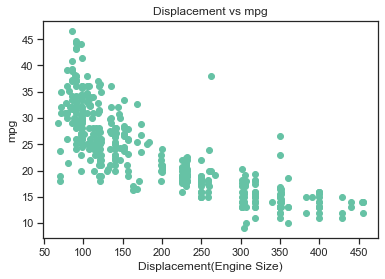

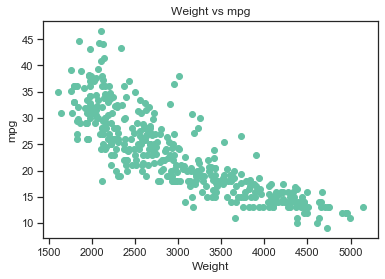

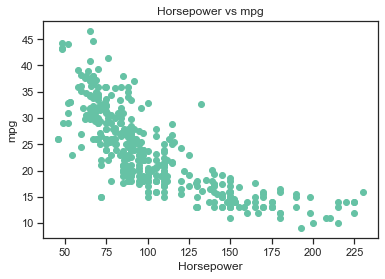

In [24]:
# 1. Fuel consumption and displacement (engine size)

plt.scatter(data['displacement'], data['mpg'])
plt.title('Displacement vs mpg')
plt.xlabel('Displacement(Engine Size)')
plt.ylabel('mpg')
plt.show()

# 2. Fuel consumption and weight

plt.scatter(data['weight'], data['mpg'])
plt.title('Weight vs mpg')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.show()

# 3. Fuel consumption and horsepower (HP)

plt.scatter(data['horsepower'], data['mpg'])
plt.title('Horsepower vs mpg')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.show()

## Questions 4-6 (30 points, i.e. 10 points each)

For each of the three cases above, use the plots to answer the questions below:

4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?
5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?
6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?



## Solution

4. There is a negative, non-linear correlation between mpg and displacement
5. There is a negative, non-linear correlation between mpg and weight
6. There is a negative, non-linear correlation between mpg and horsepower

## Questions 7-8 (30 points, i.e. 15 points each)

Write Python code to produce (box)plots that should provide good answers the questions below:

7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?
8. Are Japanese cars more fuel efficient than American or European ones?

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



## Solution

In [25]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

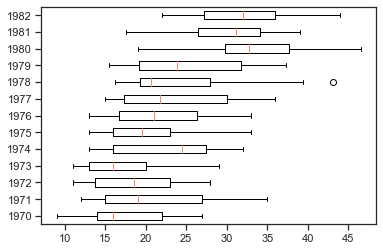

In [26]:
# 7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?

_1970 = data[data['model'] == 70]['mpg']
_1971 = data[data['model'] == 71]['mpg']
_1972 = data[data['model'] == 72]['mpg']
_1973 = data[data['model'] == 73]['mpg']
_1974 = data[data['model'] == 74]['mpg']
_1975 = data[data['model'] == 75]['mpg']
_1976 = data[data['model'] == 76]['mpg']
_1977 = data[data['model'] == 77]['mpg']
_1978 = data[data['model'] == 78]['mpg']
_1979 = data[data['model'] == 79]['mpg']
_1980 = data[data['model'] == 80]['mpg']
_1981 = data[data['model'] == 81]['mpg']
_1982 = data[data['model'] == 82]['mpg']

plt.boxplot( (_1970, _1971, _1972, _1973, _1974, _1975, _1976, _1977, _1978, _1979, _1980, _1981, _1982), 
            vert=False, labels=['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982'])
plt.show()

# Yes, vehicles did get more efficient from 1970 to 1982
# I'm sure there is a better way to do this



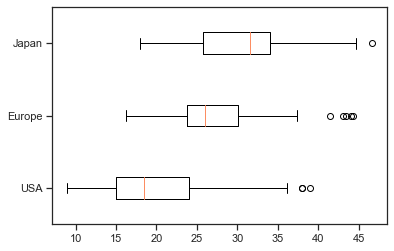

In [27]:
# 8. Are Japanese cars more fuel efficient than American or European ones?

usa = data[data['Country_code'] == 'USA']['mpg']
europe = data[data['Country_code'] == 'Europe']['mpg']
japan = data[data['Country_code'] == 'Japan']['mpg']

plt.boxplot( (usa, europe, japan), vert=False, labels=['USA','Europe','Japan'])
plt.show()

# Yes, Japanese care are more fuel efficient than American or European ones.

## Conclusions (36 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1. What have you learned from this assignment?

While I did learn a bit of python from the Computer Vision class, I feel that this class/assignment was a more in-depth introduction to the data side of things.  Loading data, selecting columns, rows, etc., these were the main focus for me on this assignment. I also learned some basic charting, which is obviously going to be very important going forward.  

2. Which parts were the most fun, time-consuming, enlightening, tedious?

I'm finding most of this quite enjoyable, to the point that I may consider switching careers, although I would probably need a bit more knowledge on statistics. The most fun items were seeing the charts once I figured out how to get the data the way I wanted it.  The time-consuming portion was this last part, the box charts. I am sure that there is a better way of displaying those box charts for each year, but I haven't found it yet.  Trying to select the data and working with those operators was the most tedious.

3. What would you do if you had an additional week to work on this?

There are two things I would focus on if I had more time. Selection of data and various charting capabilities. Looking at the book, I can see that there are countless options for selecting and displaying data.

